In [1]:
import pandas as pd

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
data=pd.read_csv(r"C:\Users\shash\OneDrive\Desktop\Datasets\My Uber Drives - 2016.csv")

In [114]:
data.head(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting
8,1/10/2016 8:05,1/10/2016 8:25,Business,Cary,Morrisville,8.3,Meeting
9,1/10/2016 12:17,1/10/2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [115]:
data.shape

(1156, 7)

In [116]:
#Checking for duplicate rows 
data[data.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


In [117]:
#Dropped the duplicate rows
data.drop_duplicates(keep='first')

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [118]:
data[data.isna().any(axis=1)]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
32,1/19/2016 9:09,1/19/2016 9:23,Business,Whitebridge,Lake Wellingborough,7.2,NaN
85,2/9/2016 10:54,2/9/2016 11:07,Personal,Whitebridge,Northwoods,5.3,NaN
86,2/9/2016 11:43,2/9/2016 11:50,Personal,Northwoods,Tanglewood,3.0,NaN
87,2/9/2016 13:36,2/9/2016 13:52,Personal,Tanglewood,Preston,5.1,NaN
...,...,...,...,...,...,...,...
1066,12/19/2016 14:37,12/19/2016 14:50,Business,Unknown Location,Unknown Location,5.4,NaN
1069,12/19/2016 19:05,12/19/2016 19:17,Business,Islamabad,Unknown Location,2.2,NaN
1071,12/20/2016 8:49,12/20/2016 9:24,Business,Unknown Location,Rawalpindi,12.0,NaN
1143,12/29/2016 20:53,12/29/2016 21:42,Business,Kar?chi,Unknown Location,6.4,NaN


In [54]:
data[data.isna().all(axis=1)]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*


In [119]:
print(data['STOP*'])

0            Fort Pierce
1            Fort Pierce
2            Fort Pierce
3            Fort Pierce
4        West Palm Beach
              ...       
1151    Unknown Location
1152    Unknown Location
1153             Gampaha
1154           Ilukwatta
1155                 NaN
Name: STOP*, Length: 1156, dtype: object


In [120]:
print(data.columns)

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')


In [121]:
print(data['PURPOSE*'].isna().sum())

503


In [122]:
data.fillna(data['MILES*'].mean())

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,21.115398
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [123]:
data=data.apply(lambda x: x.strip().lower() if isinstance(x, str) else x)

In [127]:
data['START*']=data['START*'].replace({'Kar?chi':'Karachi'})

In [128]:
print(data['START*'])

0            Fort Pierce
1            Fort Pierce
2            Fort Pierce
3            Fort Pierce
4            Fort Pierce
              ...       
1151             Karachi
1152    Unknown Location
1153          Katunayake
1154             Gampaha
1155                 NaN
Name: START*, Length: 1156, dtype: object


In [129]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [142]:
strings=data.select_dtypes(include=object).columns

In [143]:
print(strings)

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'PURPOSE*'], dtype='object')


In [146]:
string = [col for col in strings if not pd.to_datetime(data[col], errors='coerce').notna().all()] 

C:\Users\shash\AppData\Local\Temp\ipykernel_33704\3661999406.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  string = [col for col in strings if not pd.to_datetime(data[col], errors='coerce').notna().all()]
C:\Users\shash\AppData\Local\Temp\ipykernel_33704\3661999406.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  string = [col for col in strings if not pd.to_datetime(data[col], errors='coerce').notna().all()]
C:\Users\shash\AppData\Local\Temp\ipykernel_33704\3661999406.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  string = [col for col in strings if not pd.to

In [147]:
print(string)

['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'PURPOSE*']


In [149]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [150]:
data.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [153]:
data.dropna(inplace=True)

In [155]:
data.shape

(653, 7)

In [156]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [159]:
data['CATEGORY*'].value_counts()

CATEGORY*
Business    647
Personal      6
Name: count, dtype: int64

In [160]:
data['START*'].value_counts()

START*
Cary                161
Unknown Location     55
Morrisville          54
Whitebridge          36
Durham               30
                   ... 
Lower Manhattan       1
Lake Reams            1
Latta                 1
Briar Meadow          1
Gampaha               1
Name: count, Length: 131, dtype: int64

In [162]:
data['STOP*'].value_counts()

STOP*
Cary                155
Morrisville          60
Unknown Location     56
Whitebridge          37
Durham               30
                   ... 
Cedar Hill            1
Florence              1
Ridgeland             1
Daytona Beach         1
Ilukwatta             1
Name: count, Length: 137, dtype: int64

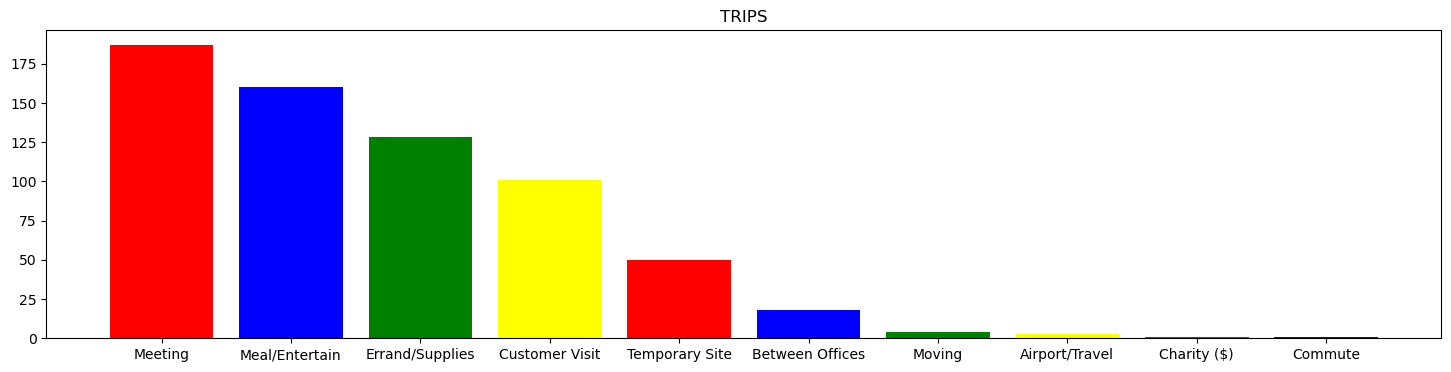

In [202]:
fig=plt.figure(figsize=(18,4))
purpose=data['PURPOSE*'].value_counts()
plt.bar(purpose.index,purpose.values,color=['red','blue','green','yellow'])
plt.title("TRIPS")
plt.savefig("Purpose of trips")
plt.show()

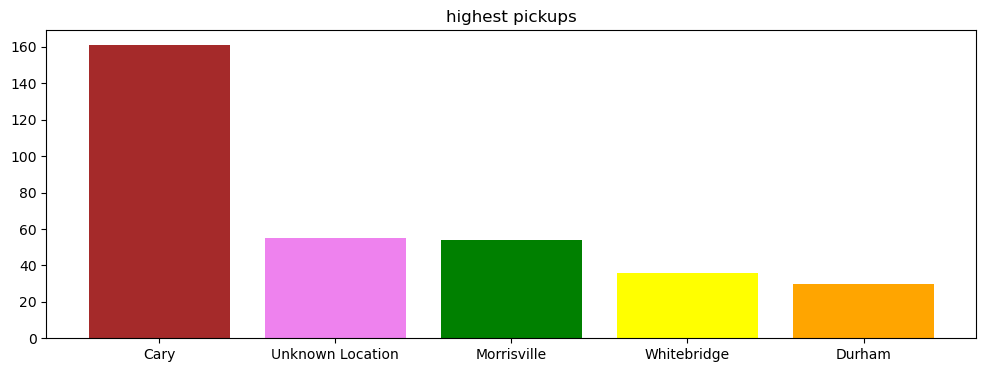

In [203]:
Pickup=data['START*'].value_counts().head(5)
fig=plt.figure(figsize=(12,4))
plt.bar(Pickup.index,Pickup.values,color=['brown','violet','green','yellow','orange'])
plt.title('highest pickups')
plt.savefig("Most pickups")
plt.show()

In [178]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


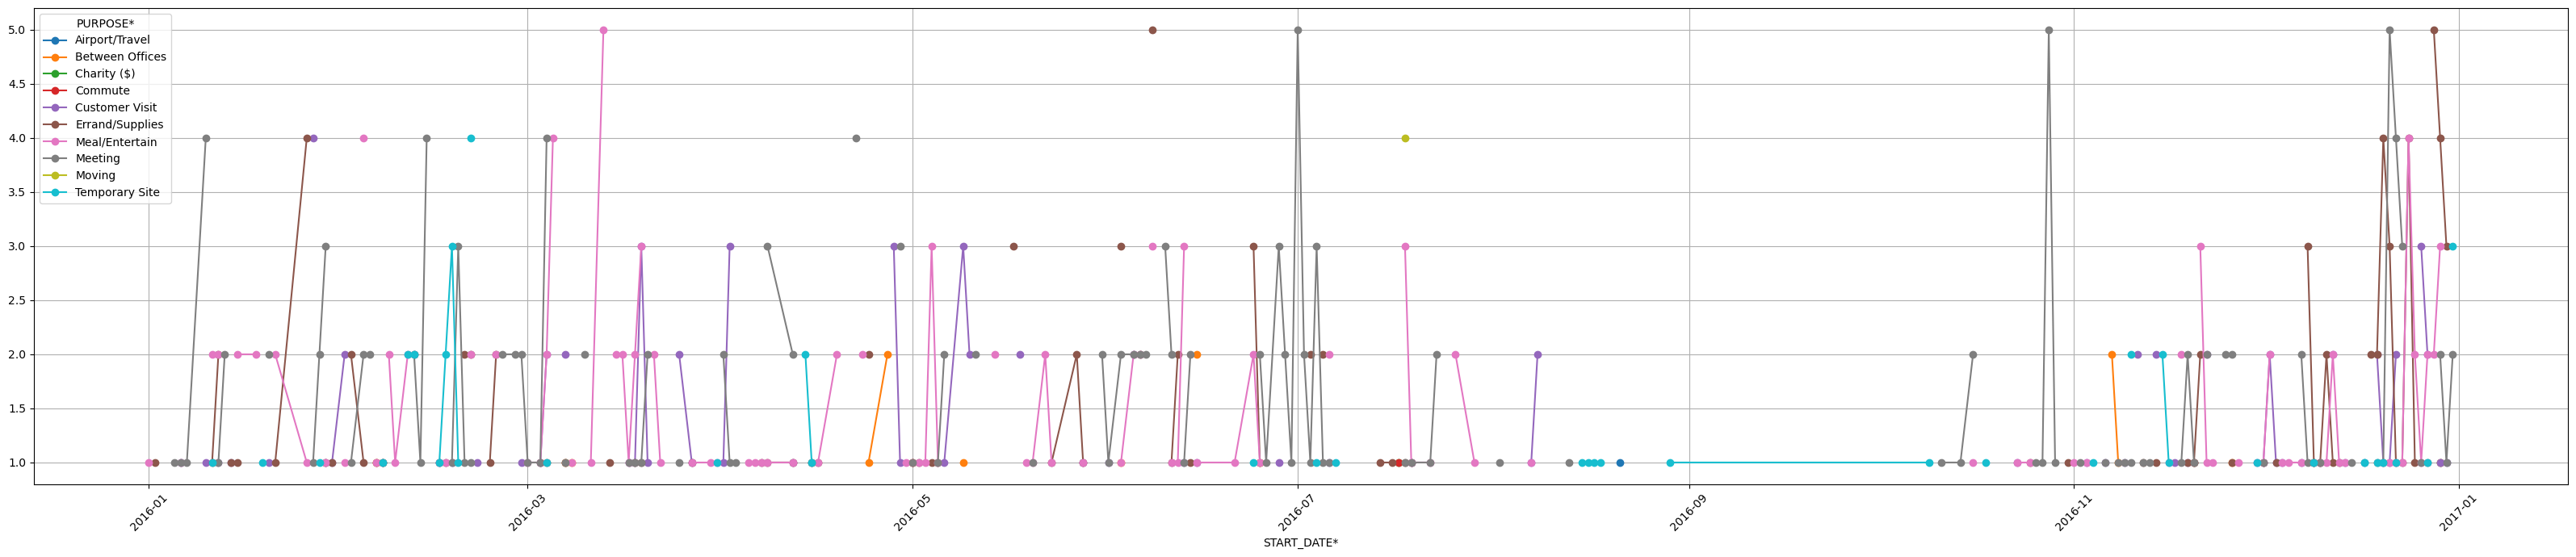

In [204]:
data['START_DATE*']=pd.to_datetime(data['START_DATE*'])
data.groupby([data['START_DATE*'].dt.date, 'PURPOSE*']).size().unstack().plot(kind='line', figsize=(32,7),marker='o')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("Trips over time")
plt.show()
